# Task #2 - To Explore Supervised Machine Learning
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#Importing all required libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Data Pre-processing

In [2]:
#Reading data from link
data=pd.read_csv('http://bit.ly/w-data')
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Viewing the dimension of the data
data.shape

(25, 2)

In [4]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
#Checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#Summary of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


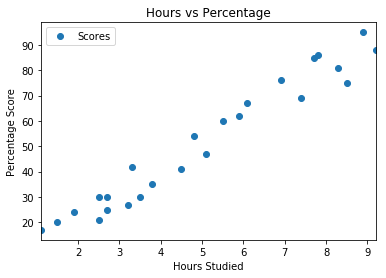

In [7]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Preparing the data

In [8]:
#Seperating the Dependent (y) & Indepented (x) variables
X = data.iloc[:, :-1].values #Attribute
y = data.iloc[:, -1].values #Labels

# Training the algorithm

In [9]:
#importing train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split
#Creating Train & Test database
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the simple linear regression to the training set

In [11]:
#importing the library for linear regrssion importing regression 
from sklearn.linear_model import LinearRegression 
#Fitting the Simple Linear Regression model to the training dataset  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


# Making Predictions

In [12]:
print(X_test) #Testing data - In Hours
y_pred = regressor.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


# Visualizing the training set result

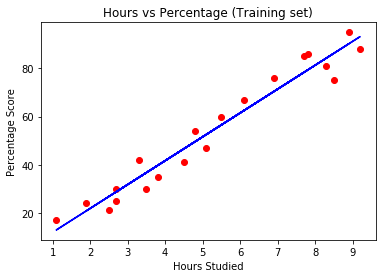

In [14]:
#Plotting for the training data
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Visualizing the test set result

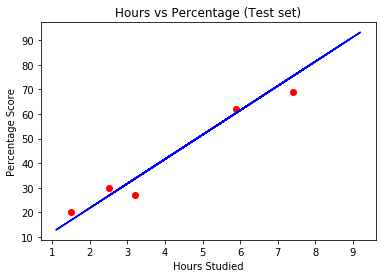

In [15]:
#Plotting for the test data
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage (Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Evaluating accuracy of the model

In [16]:
#Accuracy of the model
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105356

# Error prediction

In [17]:
#Error prediction
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',  metrics.mean_squared_error(y_test,y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# Predicting final score

In [18]:
#Predicting for 9.25 hours
hours=9.25
print("No of hours student studeid = ",hours)
print("predicting percentage scored is =",regressor.predict(np.array(hours).reshape(1,-1))[0])

No of hours student studeid =  9.25
predicting percentage scored is = 93.69173248737538


The predicted score if a student study for 9.25 hrs in a day is 93.7